<a href="https://colab.research.google.com/github/aymenchibouti/newversion/blob/master/table_data_res.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

# ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
df = pd.read_csv("model1_210_features.csv")

# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸÜÿ¥ÿßÿ∑ ŸÅŸÇÿ∑ (ŸÉŸÑ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ™Ÿä ÿ™ÿ®ÿØÿ£ ÿ®ŸÄ 'day_')
activity_cols = [col for col in df.columns if col.startswith("day_")]
activity_data = df[activity_cols].copy()

# ÿ•ÿ∂ÿßŸÅÿ© ŸÖÿπÿ±ŸÅ ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖ
activity_data["user_id"] = df["enrollment_id"]

# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ•ŸÑŸâ ÿßŸÑÿ¥ŸÉŸÑ ÿßŸÑÿ∑ŸàŸÑŸä (ÿ≤ŸÖŸÜŸä)
melted = pd.melt(
    activity_data,
    id_vars=["user_id"],
    var_name="day_activity",
    value_name="value"
)

# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßŸÑŸäŸàŸÖ ŸàŸÜŸàÿπ ÿßŸÑŸÜÿ¥ÿßÿ∑ ŸÖŸÜ ÿßÿ≥ŸÖ ÿßŸÑÿπŸÖŸàÿØ
melted[["day", "activity"]] = melted["day_activity"].str.extract(r"day_(\d+)_(.+)")
melted["day"] = melted["day"].astype(int)

# ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÜŸáÿßÿ¶Ÿäÿ©
time_series_df = melted[["user_id", "day", "activity", "value"]]

# (ÿßÿÆÿ™Ÿäÿßÿ±Ÿä) ÿ•ÿ∂ÿßŸÅÿ© ÿπŸÖŸàÿØ dropout ŸÑŸÉŸÑ user
dropout_map = df.set_index("enrollment_id")["dropout"]
time_series_df["dropout"] = time_series_df["user_id"].map(dropout_map)

# ÿ≠ŸÅÿ∏ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ ŸÅŸä ŸÖŸÑŸÅ CSV ÿ¨ÿØŸäÿØ (ÿßÿÆÿ™Ÿäÿßÿ±Ÿä)
time_series_df.to_csv("reshaped_time_series.csv", index=False)

# ÿπÿ±ÿ∂ ÿ£ŸàŸÑ 10 ÿµŸÅŸàŸÅ
print(time_series_df.head(10))


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [7]:
import pandas as pd

In [8]:
ts = pd.read_csv("reshaped_time_series.csv")

In [9]:
ts

user_id  day activity  value  dropout
0               1    1   access      3        0
1               3    1   access      7        0
2               4    1   access     18        0
3               5    1   access      0        0
4               6    1   access     12        0
...           ...  ...      ...    ...      ...
25313815   200898   30    video      0        1
25313816   200900   30    video      0        1
25313817   200901   30    video      0        1
25313818   200904   30    video      0        1
25313819   200905   30    video      0        1

[25313820 rows x 5 columns]

In [10]:
import pandas as pd

# Step 1: Load data
df = pd.read_csv("model1_210_features.csv")

# Step 2: Extract activity columns and user ID
activity_cols = [col for col in df.columns if col.startswith("day_")]
activity_data = df[activity_cols].copy()
activity_data["user_id"] = df["enrollment_id"]

# Step 3: Melt to long format
melted = pd.melt(activity_data, id_vars=["user_id"], var_name="day_activity", value_name="value")

# Step 4: Extract day and activity type
melted[["day", "activity"]] = melted["day_activity"].str.extract(r"day_(\d+)_(.+)")
melted["day"] = melted["day"].astype(int)

# Step 5: Pivot table: one row per user per day, columns = activity types
pivoted = melted.pivot_table(index=["user_id", "day"], columns="activity", values="value", fill_value=0).reset_index()

# Step 6: Aggregate by user: extract mean, sum, std, min, max per activity
aggregated = pivoted.groupby("user_id").agg(['mean', 'sum', 'std', 'min', 'max'])

# Step 7: Flatten columns
aggregated.columns = ['_'.join(col) for col in aggregated.columns]
aggregated = aggregated.reset_index()

# Step 8: Add dropout label
aggregated = aggregated.merge(df[["enrollment_id", "dropout"]], left_on="user_id", right_on="enrollment_id", how="left")
aggregated.drop(columns=["enrollment_id"], inplace=True)

# Step 9: Save to CSV (optional)
aggregated.to_csv("aggregated_features_for_dropout_prediction.csv", index=False)

# Step 10: Ready for ML!
print(aggregated.head())


   user_id  day_mean  day_sum   day_std  day_min  day_max  access_mean  \
0        1      15.5      465  8.803408        1       30     3.566667   
1        3      15.5      465  8.803408        1       30     2.633333   
2        4      15.5      465  8.803408        1       30     2.133333   
3        5      15.5      465  8.803408        1       30     7.533333   
4        6      15.5      465  8.803408        1       30     0.400000   

   access_sum  access_std  access_min  ...  video_sum  video_std  video_min  \
0       107.0    6.382537         0.0  ...       29.0   3.167544        0.0   
1        79.0    5.235709         0.0  ...        9.0   1.022168        0.0   
2        64.0    4.400104         0.0  ...        4.0   0.434172        0.0   
3       226.0   13.320281         0.0  ...       86.0   5.661323        0.0   
4        12.0    2.190890         0.0  ...        2.0   0.365148        0.0   

   video_max  wiki_mean  wiki_sum  wiki_std  wiki_min  wiki_max  dropout  
0    

In [12]:
ag = pd.read_csv("aggregated_features_for_dropout_prediction.csv")

In [13]:
ag

user_id  day_mean  day_sum   day_std  day_min  day_max  access_mean  \
0             1      15.5      465  8.803408        1       30     3.566667   
1             3      15.5      465  8.803408        1       30     2.633333   
2             4      15.5      465  8.803408        1       30     2.133333   
3             5      15.5      465  8.803408        1       30     7.533333   
4             6      15.5      465  8.803408        1       30     0.400000   
...         ...       ...      ...       ...      ...      ...          ...   
120537   200898      15.5      465  8.803408        1       30     0.000000   
120538   200900      15.5      465  8.803408        1       30     0.000000   
120539   200901      15.5      465  8.803408        1       30     0.100000   
120540   200904      15.5      465  8.803408        1       30     0.000000   
120541   200905      15.5      465  8.803408        1       30     0.000000   

        access_sum  access_std  access_min  ...  video_sum  video_std  \
0            107.0    6.382537         0.0  ...       29.0   3.167544   
1             79.0    5.235709         0.0  ...        9.0   1.022168   
2             64.0    4.400104         0.0  ...        4.0   0.434172   
3            226.0   13.320281         0.0  ...       86.0   5.661323   
4             12.0    2.190890         0.0  ...        2.0   0.365148   
...            ...         ...         ...  ...        ...        ...   
120537         0.0    0.000000         0.0  ...        0.0   0.000000   
120538         0.0    0.000000         0.0  ...        0.0   0.000000   
120539         3.0    0.547723         0.0  ...        1.0   0.182574   
120540         0.0    0.000000         0.0  ...        0.0   0.000000   
120541         0.0    0.000000         0.0  ...        0.0   0.000000   

        video_min  video_max  wiki_mean  wiki_sum  wiki_std  wiki_min  \
0             0.0       16.0        0.0       0.0       0.0       0.0   
1             0.0        4.0        0.0       0.0       0.0       0.0   
2             0.0        2.0        0.0       0.0       0.0       0.0   
3             0.0       20.0        0.0       0.0       0.0       0.0   
4             0.0        2.0        0.0       0.0       0.0       0.0   
...           ...        ...        ...       ...       ...       ...   
120537        0.0        0.0        0.0       0.0       0.0       0.0   
120538        0.0        0.0        0.0       0.0       0.0       0.0   
120539        0.0        1.0        0.0       0.0       0.0       0.0   
120540        0.0        0.0        0.0       0.0       0.0       0.0   
120541        0.0        0.0        0.0       0.0       0.0       0.0   

        wiki_max  dropout  
0            0.0        0  
1            0.0        0  
2            0.0        0  
3            0.0        0  
4            0.0        0  
...          ...      ...  
120537       0.0        1  
120538       0.0        1  
120539       0.0        1  
120540       0.0        1  
120541       0.0        1  

[120542 rows x 42 columns]

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = aggregated.drop(columns=["user_id", "dropout"])
y = aggregated["dropout"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.53      0.62      5061
           1       0.88      0.95      0.91     19048

    accuracy                           0.86     24109
   macro avg       0.81      0.74      0.76     24109
weighted avg       0.85      0.86      0.85     24109



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:07:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.53      0.62      5061
           1       0.88      0.95      0.92     19048

    accuracy                           0.86     24109
   macro avg       0.82      0.74      0.77     24109
weighted avg       0.86      0.86      0.86     24109



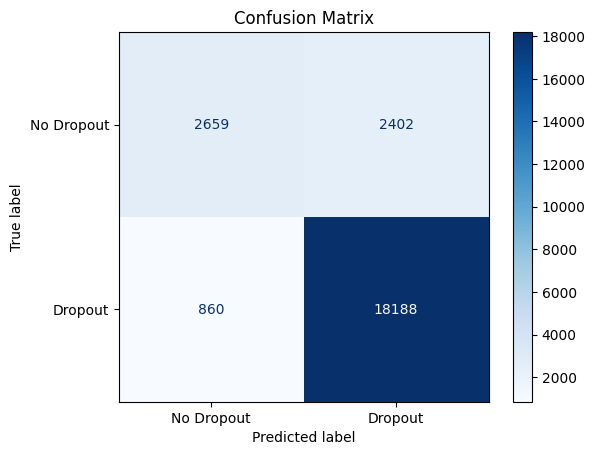

/tmp/ipython-input-2243808958.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="viridis")


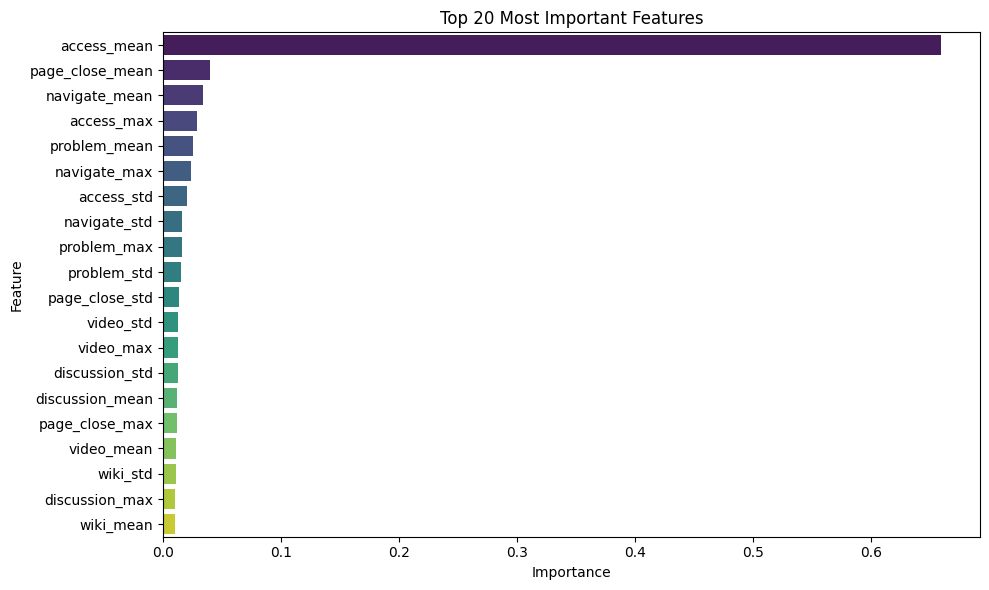

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
df = pd.read_csv("aggregated_features_for_dropout_prediction.csv")

# 2. ŸÅÿµŸÑ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸàÿßŸÑŸáÿØŸÅ
X = df.drop(columns=["user_id", "dropout"])
y = df["dropout"]

# 3. ÿ™Ÿàÿ≠ŸäÿØ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. ÿ•ŸÜÿ¥ÿßÿ° Ÿàÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
model = XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 6. ÿßŸÑÿ™ŸÜÿ®ÿ§
y_pred = model.predict(X_test)

# 7. ÿπÿ±ÿ∂ ÿ™ŸÇÿ±Ÿäÿ± ÿßŸÑÿ™ÿµŸÜŸäŸÅ
print("Classification Report:\n", classification_report(y_test, y_pred))

# 8. ÿ±ÿ≥ŸÖ ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿßŸÑÿ™ÿ®ÿßÿ≥
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Dropout", "Dropout"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 9. ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿ£ŸáŸÖ ÿßŸÑŸÖŸäÿ≤ÿßÿ™
importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False).head(20)

# 10. ÿ±ÿ≥ŸÖ ÿ£ŸáŸÖ 20 ŸÖŸäÿ≤ÿ©
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="viridis")
plt.title("Top 20 Most Important Features")
plt.tight_layout()
plt.show()


In [17]:
!pip install pandas matplotlib seaborn scikit-learn xgboost catboost imbalanced-learn


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:19:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:21:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


‚úÖ Accuracy: 0.8535401717201045

üìä Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.63      0.64      5061
           1       0.90      0.91      0.91     19048

    accuracy                           0.85     24109
   macro avg       0.78      0.77      0.78     24109
weighted avg       0.85      0.85      0.85     24109



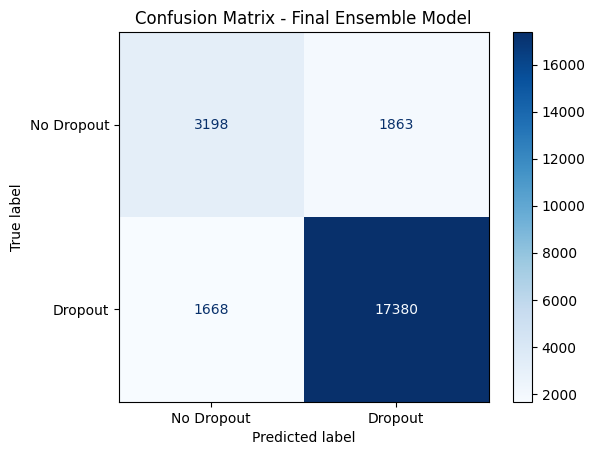

/tmp/ipython-input-1804793111.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_feat_df, x="Importance", y="Feature", palette="viridis")


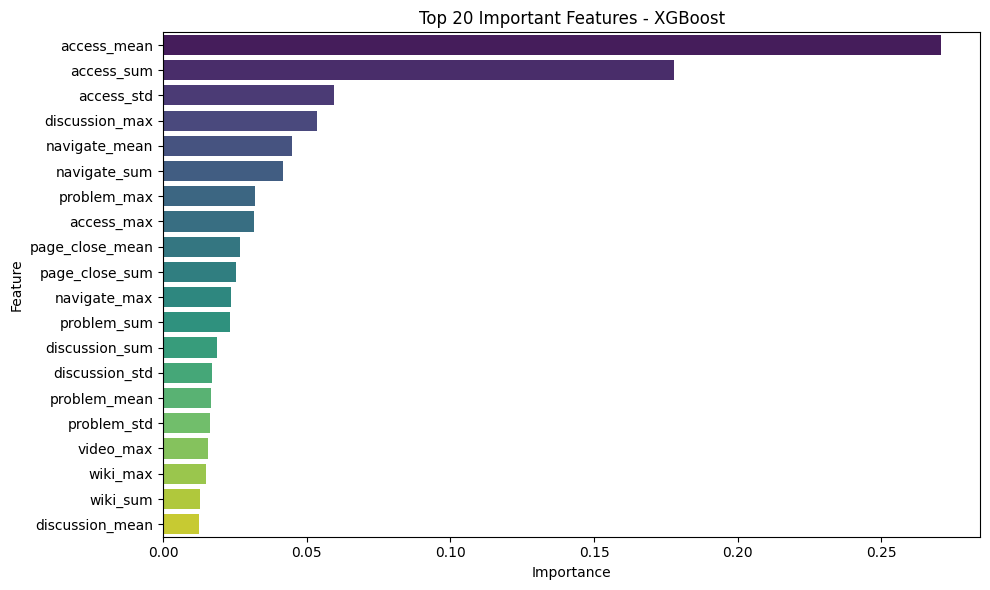

/tmp/ipython-input-1804793111.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_feat_df, x="Importance", y="Feature", palette="rocket")


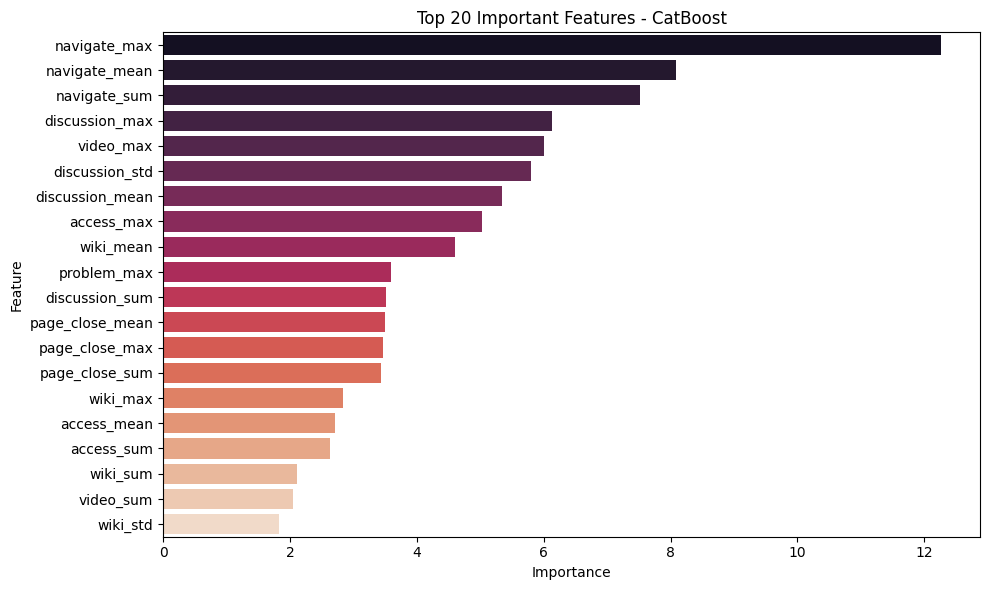

In [18]:
# ============================
# 1. ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™
# ============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

# ============================
# 2. ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ============================
df = pd.read_csv("aggregated_features_for_dropout_prediction.csv")
X = df.drop(columns=["user_id", "dropout"])
y = df["dropout"]

# ============================
# 3. ŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ============================
# ÿ™Ÿàÿ≠ŸäÿØ ÿßŸÑŸÖŸäÿ≤ÿßÿ™
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ÿ™ŸÇÿ≥ŸäŸÖ ÿ•ŸÑŸâ ÿ™ÿØÿ±Ÿäÿ® ŸàÿßÿÆÿ™ÿ®ÿßÿ±
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ŸÖÿπÿßŸÑÿ¨ÿ© ÿπÿØŸÖ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÅÿ¶ÿßÿ™
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# ============================
# 4. ÿ∂ÿ®ÿ∑ ŸÜŸÖŸàÿ∞ÿ¨ XGBoost
# ============================
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
xgb_random.fit(X_resampled, y_resampled)
best_xgb = xgb_random.best_estimator_

# ============================
# 5. ÿ™ÿØÿ±Ÿäÿ® ÿ®ÿßŸÇŸä ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨
# ============================
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
cat = CatBoostClassifier(verbose=0, iterations=300, learning_rate=0.05, depth=6)

rf.fit(X_resampled, y_resampled)
cat.fit(X_resampled, y_resampled)

# ============================
# 6. ŸÜŸÖŸàÿ∞ÿ¨ Ensemble Voting
# ============================
voting = VotingClassifier(estimators=[
    ('xgb', best_xgb),
    ('rf', rf),
    ('cat', cat)
], voting='soft')

voting.fit(X_resampled, y_resampled)
y_pred = voting.predict(X_test)

# ============================
# 7. ÿßŸÑÿ™ŸÇŸäŸäŸÖ
# ============================
print("‚úÖ Accuracy:", accuracy_score(y_test, y_pred))
print("\nüìä Classification Report:\n", classification_report(y_test, y_pred))

# ===== ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿßŸÑÿ™ÿ®ÿßÿ≥ =====
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Dropout", "Dropout"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Final Ensemble Model")
plt.show()

# ============================
# 8. ÿ£ŸáŸÖ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸÖŸÜ XGBoost
# ============================
xgb_importances = best_xgb.feature_importances_
xgb_feat_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_importances
}).sort_values(by="Importance", ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_feat_df, x="Importance", y="Feature", palette="viridis")
plt.title("Top 20 Important Features - XGBoost")
plt.tight_layout()
plt.show()

# ============================
# 9. ÿ£ŸáŸÖ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸÖŸÜ CatBoost
# ============================
cat_importances = cat.get_feature_importance()
cat_feat_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": cat_importances
}).sort_values(by="Importance", ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=cat_feat_df, x="Importance", y="Feature", palette="rocket")
plt.title("Top 20 Important Features - CatBoost")
plt.tight_layout()
plt.show()
